In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Загрузка данных датасета малярии
data, info = tfds.load('malaria', split='train', with_info=True)
num_classes = info.features['label'].num_classes

# Разделение на обучающую и валидационную выборки
train_data, val_data = tfds.load('malaria', split=['train[:80%]', 'train[80%:]'], as_supervised=True)

# Предобработка данных
def preprocess_data(image, label):
    image = tf.image.resize(image, (224, 224)) / 255.0
    return image, label

batch_size = 64
train_data = train_data.map(preprocess_data).batch(batch_size)
val_data = val_data.map(preprocess_data).batch(batch_size)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incompleteP1CZAY/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [3]:
# Создание модели CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')  # Классификация на 5 классов
])

# Компиляция модели
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [4]:
# Обучение модели
history = model.fit(train_data, epochs=3, validation_data=val_data)

Epoch 1/3
345/345 [==============================] - 54s 122ms/step - loss: 0.4981 - accuracy: 0.7844 - val_loss: 0.2972 - val_accuracy: 0.9303
Epoch 2/3
345/345 [==============================] - 44s 128ms/step - loss: 0.2085 - accuracy: 0.9315 - val_loss: 0.1848 - val_accuracy: 0.9463
Epoch 3/3
345/345 [==============================] - 45s 131ms/step - loss: 0.1661 - accuracy: 0.9445 - val_loss: 0.1977 - val_accuracy: 0.9429


In [5]:
model.save('malaria_model.h5')

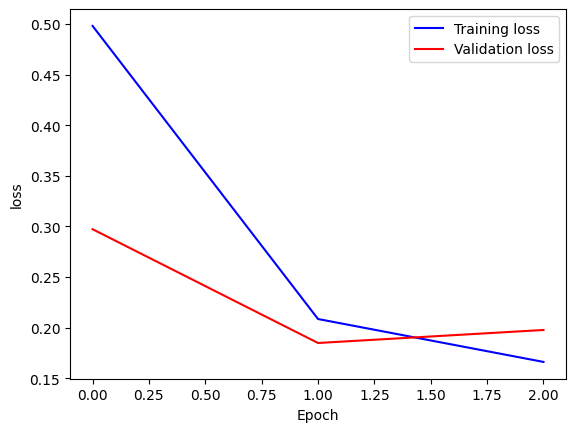

In [6]:
import matplotlib.pyplot as plt


# Построение графика точности
plt.plot(history.history['loss'], 'b', label='Training loss')
plt.plot(history.history['val_loss'], 'r', label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

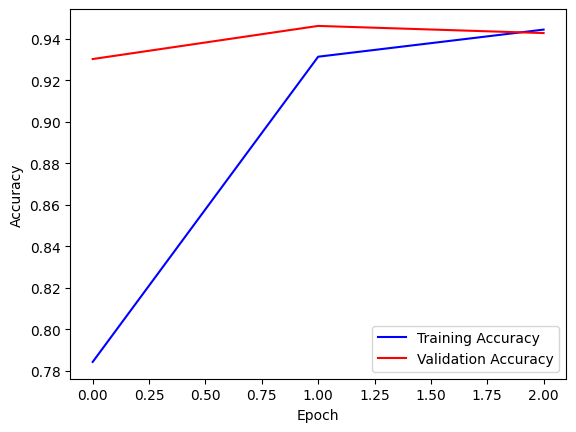

In [7]:
# Построение графика точности
plt.plot(history.history['accuracy'], 'b', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'r', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()